### Name-Harsh Yadav

### Importing the data of flower

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()


### Data splinting into two class

In [51]:
X = iris.data
y = iris.target

# Redefine the target variable into two classes: 'virginica' and 'non-virginica'
y = ['virginica' if target == 2 else 'non-virginica' for target in y]

# Create a DataFrame combining features and target variable
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['class'] = y

### Data statistics

In [52]:
# Print descriptive statistics for each class
print("Descriptive Statistics for 'virginica' class:")
print(df[df['class'] == 'virginica'].describe())

print("\nDescriptive Statistics for 'non-virginica' class:")
print(df[df['class'] == 'non-virginica'].describe())

Descriptive Statistics for 'virginica' class:
       sepal length (cm)  sepal width (cm)  petal length (cm)   
count           50.00000         50.000000          50.000000  \
mean             6.58800          2.974000           5.552000   
std              0.63588          0.322497           0.551895   
min              4.90000          2.200000           4.500000   
25%              6.22500          2.800000           5.100000   
50%              6.50000          3.000000           5.550000   
75%              6.90000          3.175000           5.875000   
max              7.90000          3.800000           6.900000   

       petal width (cm)  
count          50.00000  
mean            2.02600  
std             0.27465  
min             1.40000  
25%             1.80000  
50%             2.00000  
75%             2.30000  
max             2.50000  

Descriptive Statistics for 'non-virginica' class:
       sepal length (cm)  sepal width (cm)  petal length (cm)   
count         100.

### Plotting target value for two classes

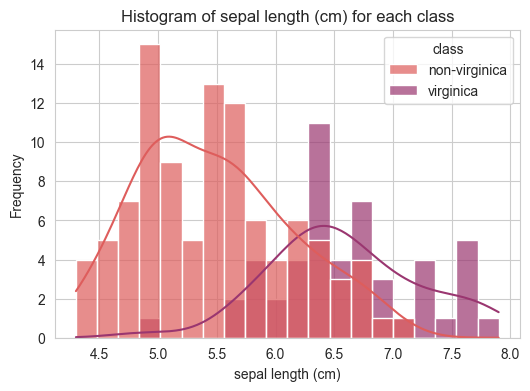

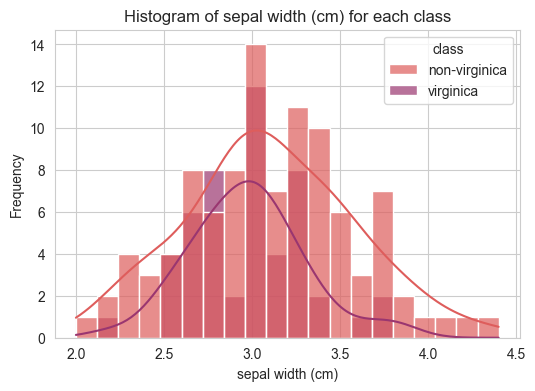

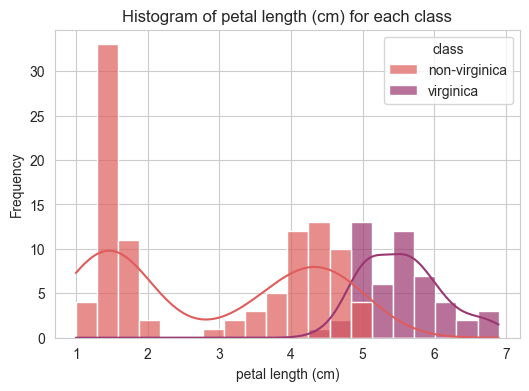

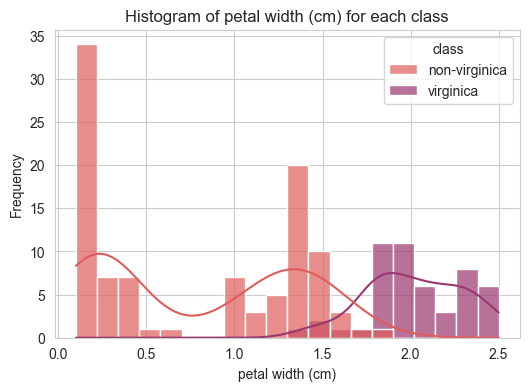

In [60]:
# using hue to show data of two classes in each target value
for feature in iris.feature_names:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue='class', kde=True, bins=20, alpha=0.7, palette='flare')
    plt.title(f'Histogram of {feature} for each class')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

## Finding correlation between features

In [54]:
df_features = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Compute the correlation matrix
correlation_matrix = df_features.corr()

# Print the correlation matrix
print(correlation_matrix)

                   sepal length (cm)  sepal width (cm)  petal length (cm)   
sepal length (cm)           1.000000         -0.117570           0.871754  \
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


### Plotting heatmap of correlation

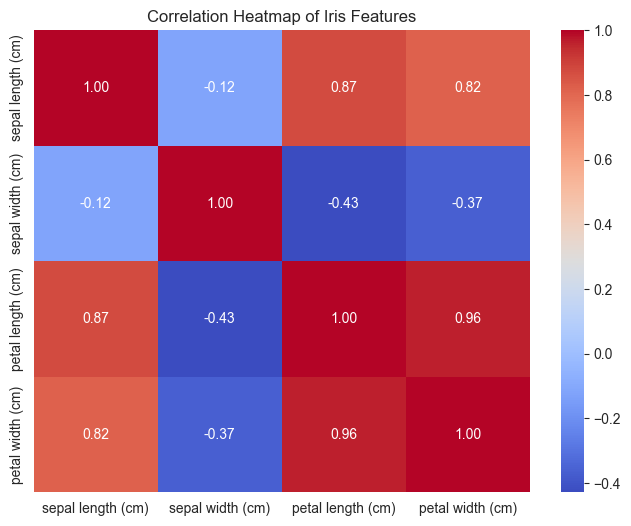

In [55]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Iris Features')
plt.show()

### kaggle data explore

### Data splitting

In [61]:
from sklearn.model_selection import train_test_split

# Split the data into a temporary set (135 records) and a test set (15 records)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=15, random_state=42)

# Split the temporary set into a training set (120 records) and a validation set (15 records)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=15, random_state=42)

# Print the sizes of each set
print("Train set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))


Train set size: 120
Validation set size: 15
Test set size: 15


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the number of features for each model
num_features = [1, 2, 3, 4]

# Shuffle feature names
shuffled_features = list(iris.feature_names)
np.random.shuffle(shuffled_features)

# Iterate over different number of features
for num_feat in num_features:
    # Select features based on the shuffled list
    selected_features = shuffled_features[:num_feat]
    
    # Index of selected features in the original feature names list
    selected_feat_indices = [iris.feature_names.index(feat) for feat in selected_features]
    
    # Select the corresponding columns from the dataset
    X_train_selected = X_train[:, selected_feat_indices]
    X_val_selected = X_val[:, selected_feat_indices]
    X_test_selected = X_test[:, selected_feat_indices]
    
    # Create and train the logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_selected, y_train)
    
    # Make predictions on validation set
    y_pred = model.predict(X_val_selected)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    
    # Print the number of features and accuracy
    print(f"Number of Features: {num_feat}, Validation Accuracy: {accuracy:.4f}")



Number of Features: 1, Validation Accuracy: 1.0000
Number of Features: 2, Validation Accuracy: 1.0000
Number of Features: 3, Validation Accuracy: 1.0000
Number of Features: 4, Validation Accuracy: 1.0000
